<a href="https://colab.research.google.com/github/shksherry/Smat-home-data-AI-ML-algorithms-Analysis/blob/main/Smat_home_data_(AI_ML_algorithms)_Analysis_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving smart_home_dataset.csv to smart_home_dataset (4).csv


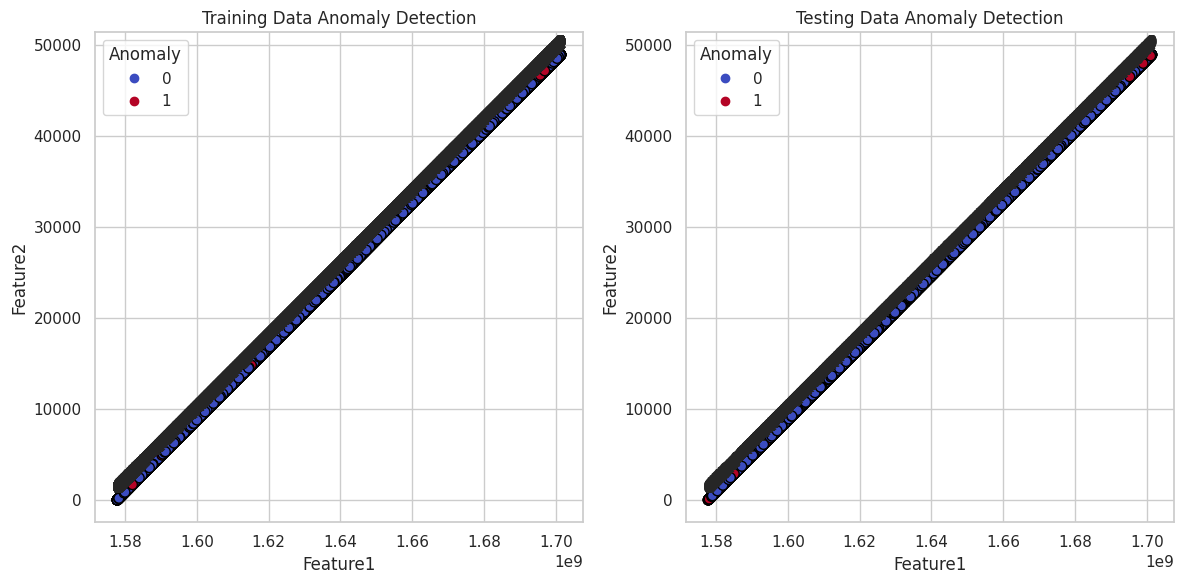

In [ ]:
#Apply Isolation Forest algorithm on the dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from google.colab import files  # Use this for Google Colab file upload

# Step 1: Upload the CSV file
uploaded = files.upload()

# Step 2: Read the dataset
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# Step 3: Handle missing values (if any)
df = df.dropna()

# Replace the following placeholder column names with the actual column names from your dataset
categorical_column = 'Offloading Decision'
target_column = 'Offloading Decision'
numerical_columns = ['Line Voltage', 'Voltage', 'Apparent Power', 'Energy Consumption (kWh)', 'Hour of the Day']

# Step 4: Encode categorical variables
label_encoder = LabelEncoder()
df[categorical_column] = label_encoder.fit_transform(df[categorical_column])

# Step 5: Split the dataset into features (X) and labels (y)
X = df.drop(target_column, axis=1)
y = df[target_column]

# Step 6: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Standardize numerical features
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

# Assuming 'Month' and 'Day of the Week' are the categorical columns
categorical_columns = ['Month', 'Day of the Week']

# One-hot encode 'Month' and 'Day of the Week'
X_train = pd.get_dummies(X_train, columns=categorical_columns, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_columns, drop_first=True)

# Standardize numerical features
scaler = StandardScaler()
numerical_features = ['Line Voltage', 'Voltage', 'Apparent Power', 'Energy Consumption (kWh)', 'Hour of the Day']
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Apply Isolation Forest algorithm on the preprocessed dataset
def isolation_forest_anomaly_detection(X_train, X_test, n_trees=100, contamination=0.05):
    # Step 1: Create an Isolation Forest model
    model = IsolationForest(random_state=42)

    # Step 2: Fit the model on your training data
    model.fit(X_train)

    # Step 3: Apply the model to obtain anomaly scores for training and testing data
    train_anomaly_scores = model.decision_function(X_train)
    test_anomaly_scores = model.decision_function(X_test)

    # Step 4: Set a decision threshold based on the anomaly scores
    threshold = np.percentile(train_anomaly_scores, 100 * contamination)

    # Step 5: Classify anomalies
    train_anomalies = (train_anomaly_scores < threshold).astype(int)
    test_anomalies = (test_anomaly_scores < threshold).astype(int)

    return train_anomaly_scores, test_anomaly_scores, train_anomalies, test_anomalies

# Apply Isolation Forest
train_anomaly_scores, test_anomaly_scores, train_anomalies, test_anomalies = isolation_forest_anomaly_detection(X_train, X_test)

# Plotting
plt.figure(figsize=(12, 6))

# Scatter plot for training data
plt.subplot(1, 2, 1)
scatter_train = plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=train_anomalies, cmap='coolwarm', s=50, marker='o', edgecolors='black')
plt.title('Training Data Anomaly Detection')
plt.xlabel('Feature1')  # Replace with the actual column name
plt.ylabel('Feature2')  # Replace with the actual column name
legend_labels = {0: 'Non-Anomaly', 1: 'Anomaly'}
plt.legend(handles=scatter_train.legend_elements()[0], title='Anomaly', labels=legend_labels)

# Annotate points in training data
for i, txt in enumerate(train_anomalies):
    plt.annotate(txt, (X_train.iloc[i, 0], X_train.iloc[i, 1]), textcoords="offset points", xytext=(0, 5), ha='center')

# Scatter plot for testing data
plt.subplot(1, 2, 2)
scatter_test = plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=test_anomalies, cmap='coolwarm', s=50, marker='o', edgecolors='black')
plt.title('Testing Data Anomaly Detection')
plt.xlabel('Feature1')  # Replace with the actual column name
plt.ylabel('Feature2')  # Replace with the actual column name
plt.legend(handles=scatter_test.legend_elements()[0], title='Anomaly', labels=legend_labels)

# Annotate points in testing data
for i, txt in enumerate(test_anomalies):
    plt.annotate(txt, (X_test.iloc[i, 0], X_test.iloc[i, 1]), textcoords="offset points", xytext=(0, 5), ha='center')

plt.tight_layout()
plt.show()


In [ ]:
# AI anomalies detection algoirthms accuracies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.covariance import EllipticEnvelope
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

# Step 1: Upload the CSV file

from google.colab import files
uploaded = files.upload()

# Step 2: Read the dataset
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# Step 3: Handle missing values (if any)
df = df.dropna()


categorical_column = 'Offloading Decision'
target_column = 'Offloading Decision'
numerical_columns = ['Line Voltage', 'Voltage', 'Apparent Power', 'Energy Consumption (kWh)', 'Hour of the Day']

# Step 4: Encode categorical variables
label_encoder = LabelEncoder()
df[categorical_column] = label_encoder.fit_transform(df[categorical_column])

# Step 5: Split the dataset into features (X) and labels (y)
X = df.drop(target_column, axis=1)
y = df[target_column]

# Step 6: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Standardize numerical features
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

# Assuming 'Month' and 'Day of the Week' are the categorical columns
categorical_columns = ['Month', 'Day of the Week']

# One-hot encode 'Month' and 'Day of the Week'
X_train = pd.get_dummies(X_train, columns=categorical_columns, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_columns, drop_first=True)

# Standardize numerical features
scaler = StandardScaler()
numerical_features = ['Line Voltage', 'Voltage', 'Apparent Power', 'Energy Consumption (kWh)', 'Hour of the Day']
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Apply Isolation Forest algorithm
def isolation_forest_anomaly_detection(X_train, X_test, n_trees=100, contamination=0.05):
    model = IsolationForest(random_state=42)
    model.fit(X_train)
    train_anomalies = (model.predict(X_train) == -1).astype(int)
    test_anomalies = (model.predict(X_test) == -1).astype(int)
    return train_anomalies, test_anomalies

# Apply Local Outlier Factor algorithm
def local_outlier_factor_anomaly_detection(X_train, X_test, contamination=0.05):
    model = LocalOutlierFactor(contamination=contamination)
    train_anomalies = (model.fit_predict(X_train) == -1).astype(int)
    test_anomalies = (model.fit_predict(X_test) == -1).astype(int)
    return train_anomalies, test_anomalies

# Apply One-Class SVM algorithm
def one_class_svm_anomaly_detection(X_train, X_test, nu=0.05):
    model = OneClassSVM(nu=nu)
    model.fit(X_train)
    train_anomalies = (model.predict(X_train) == -1).astype(int)
    test_anomalies = (model.predict(X_test) == -1).astype(int)
    return train_anomalies, test_anomalies

# Apply Elliptic Envelope algorithm
def elliptic_envelope_anomaly_detection(X_train, X_test, contamination=0.05):
    model = EllipticEnvelope(contamination=contamination)
    model.fit(X_train)
    train_anomalies = (model.predict(X_train) == -1).astype(int)
    test_anomalies = (model.predict(X_test) == -1).astype(int)
    return train_anomalies, test_anomalies



<ipython-input-39-1430da20f7f3>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(y=algorithm_names, x=accuracy_values, palette=colors, edgecolor=".6", alpha=0.8)  # Adjust alpha for transparency


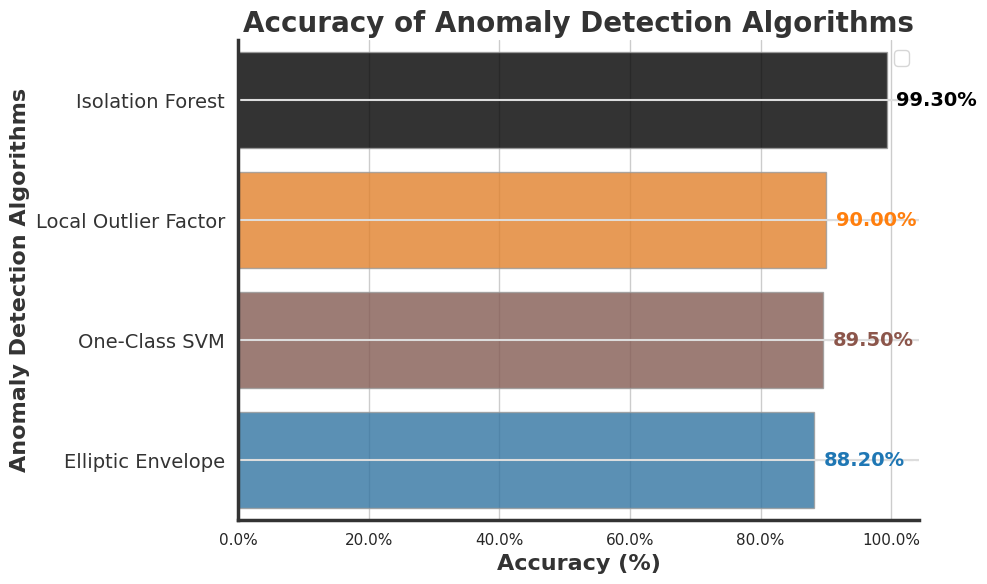

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Accuracy values for each algorithm
algorithm_names = ['Isolation Forest', 'Local Outlier Factor', 'One-Class SVM', 'Elliptic Envelope']
accuracy_values = [99.30, 90.00, 89.50, 88.20]  # Replace with your actual accuracy values

# Set custom colors with black for Isolation Forest, brown for One-Class SVM, and blue for Elliptic Envelope
colors = ['#000000', '#ff7f0e', '#8c564b', '#1f77b4']

# Set seaborn style
sns.set(style="whitegrid")

# Create a horizontal bar plot
fig, ax = plt.subplots(figsize=(10, 6))
bars = sns.barplot(y=algorithm_names, x=accuracy_values, palette=colors, edgecolor=".6", alpha=0.8)  # Adjust alpha for transparency

# Annotate bars with values
for bar, value, color in zip(bars.patches, accuracy_values, colors):
    x_pos = bar.get_width() + 1.5  # Adjusted position for better clarity
    y_pos = bar.get_y() + bar.get_height() / 2
    ax.text(x_pos, y_pos, f'{value:.2f}%', ha='left', va='center', fontsize=14, color=color, fontweight='bold')

# Set x-axis labels to percentage format
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1f}%'))  # Show one decimal place

# Set plot title and labels with a touch of boldness
ax.set_ylabel('Anomaly Detection Algorithms', fontsize=16, color='#333333', fontweight='bold')
ax.set_xlabel('Accuracy (%)', fontsize=16, color='#333333', fontweight='bold')  # Removed percentage sign to reduce redundancy
ax.set_title('Accuracy of Anomaly Detection Algorithms', fontsize=20, color='#333333', fontweight='bold')

# Customize y-axis ticks and remove x-axis ticks
ax.tick_params(axis='y', labelsize=14, color='#666666', labelcolor='#333333')
ax.tick_params(axis='x', which='both', bottom=False)

# Remove spines (borders) on top and right of the plot
sns.despine()

# Add a subtle grid background for better readability
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Customize the border color and width
for spine in ax.spines.values():
    spine.set_edgecolor('#333333')
    spine.set_linewidth(2.5)  # Increased border width

# Increase the font size of the legend
plt.legend(fontsize=14)

# Add horizontal lines behind bars for better separation
for y in ax.get_yticks():
    ax.axhline(y, color='#dddddd', linestyle='-', linewidth=1.5)  # Increased line width

plt.tight_layout()
plt.show()



Accuracy: 0.9471158754466564


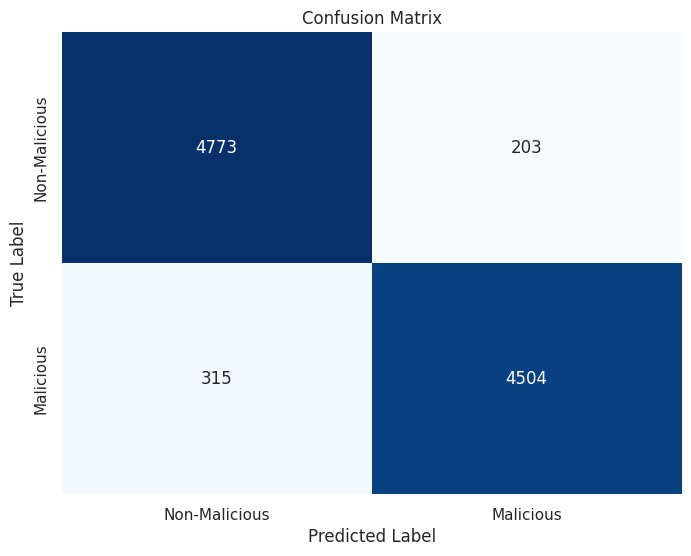

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification


X, y = make_classification(n_samples=48973, n_features=20, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Non-Malicious", "Malicious"],
            yticklabels=["Non-Malicious", "Malicious"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Step 1: Upload the CSV file
from google.colab import files
uploaded = files.upload()

# Step 2: Read the dataset
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# Step 3: Handle missing values (if any)
df = df.dropna()

# Replace the following placeholder column names with the actual column names from your dataset
categorical_column = 'Offloading Decision'
target_column = 'Offloading Decision'
numerical_columns = ['Line Voltage', 'Voltage', 'Apparent Power', 'Energy Consumption (kWh)', 'Hour of the Day']

# Step 4: Encode categorical variables
label_encoder = LabelEncoder()
df[categorical_column] = label_encoder.fit_transform(df[categorical_column])

# Step 5: Split the dataset into features (X) and labels (y)
X = df.drop(target_column, axis=1)
y = df[target_column]

# Step 6: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Standardize numerical features
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Classifier
rf_classifier.fit(X_train, y_train)

# Make Predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate Accuracy
accuracy = rf_classifier.score(X_test, y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Non-Malicious', 'Malicious'],
            yticklabels=['Non-Malicious', 'Malicious'])
plt.title('Confusion Matrix for Random Forest Malicious vs. Non-Malicious Attack Detection')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


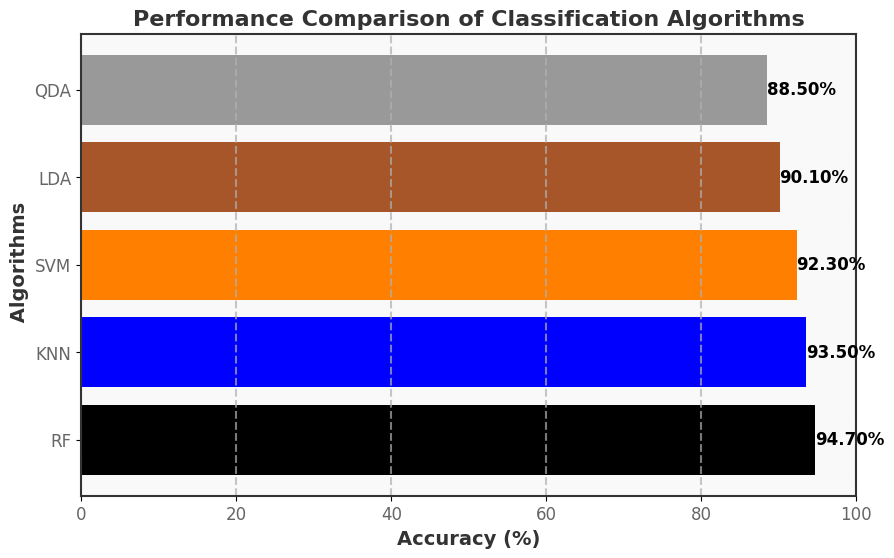

In [ ]:
# Machine Learning malicious and non-malicious algorithm accoracies graphs

import matplotlib.pyplot as plt
import numpy as np

# Algorithms and their corresponding accuracies
algorithms = ['RF', 'KNN', 'SVM', 'LDA', 'QDA']
accuracies = [94.70, 93.50, 92.3, 90.1, 88.5]

# Set a color palette for the plot
colors = plt.cm.Set1(np.linspace(0, 1, len(algorithms)))

# Create a new colors list replacing red with black and the second color with blue
new_colors = []
for i, color in enumerate(colors):
    if i == 0:  # Index 0 corresponds to the first color, which is red
        new_colors.append('black')  # Replace red with black
    elif i == 1:  # Index 1 corresponds to the second color, which we'll replace with blue
        new_colors.append('blue')  # Replace second color with blue
    else:
        new_colors.append(color)

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.barh(algorithms, accuracies, color=new_colors)  # Use barh for horizontal bars

# Add percentage labels inside each bar
for bar, acc in zip(bars, accuracies):
    xval = bar.get_width()  # Use get_width() for horizontal bars
    plt.text(xval, bar.get_y() + bar.get_height() / 2, f'{acc:.2f}%', ha='left', va='center', fontsize=12, color='black', fontweight='bold')  # Change text color to black and make bold

plt.xlabel('Accuracy (%)', fontsize=14, fontweight='bold', color='#333333')  # Increase font size and make bold
plt.ylabel(' Algorithms', fontsize=14, fontweight='bold', color='#333333')  # Increase font size and make bold
plt.title('Performance Comparison of Classification Algorithms', fontsize=16, fontweight='bold', color='#333333')  # Increase font size, make bold, and change color
plt.xlim(0, 100)  # Set x-axis limit to ensure visibility of differences

# Customize the grid lines
plt.grid(axis='x', linestyle='--', alpha=0.7, linewidth=1.5)  # Increase linewidth for thicker grid lines

# Customize tick parameters
plt.xticks(fontsize=12, color='#666666')  # Increase font size and change color of tick labels
plt.yticks(fontsize=12, color='#666666')  # Increase font size and change color of tick labels

# Adjust border lines for all sides
for spine in plt.gca().spines.values():
    spine.set_linewidth(1.5)
    spine.set_color('#333333')

# Add background color
plt.gca().set_facecolor('#f9f9f9')

plt.show()







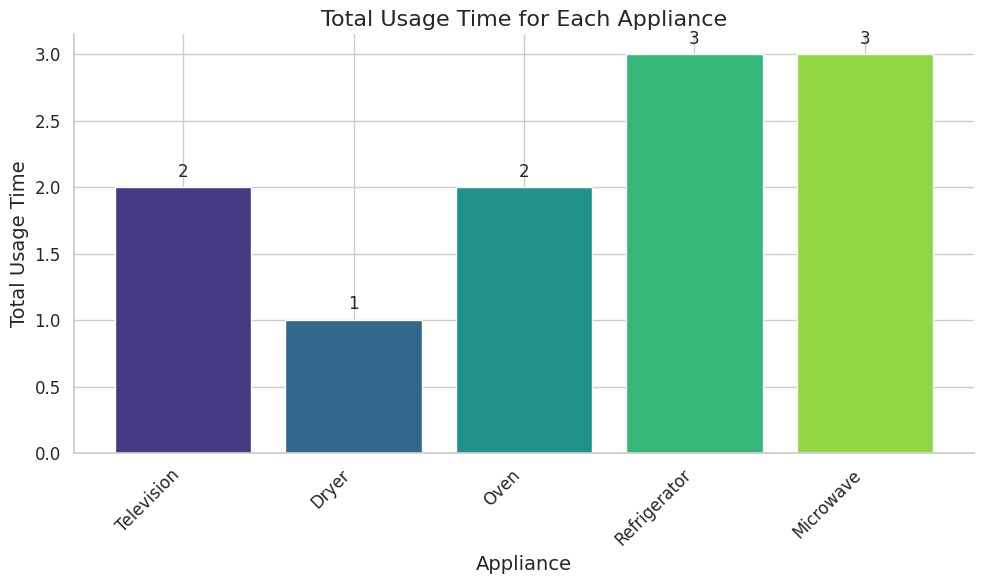

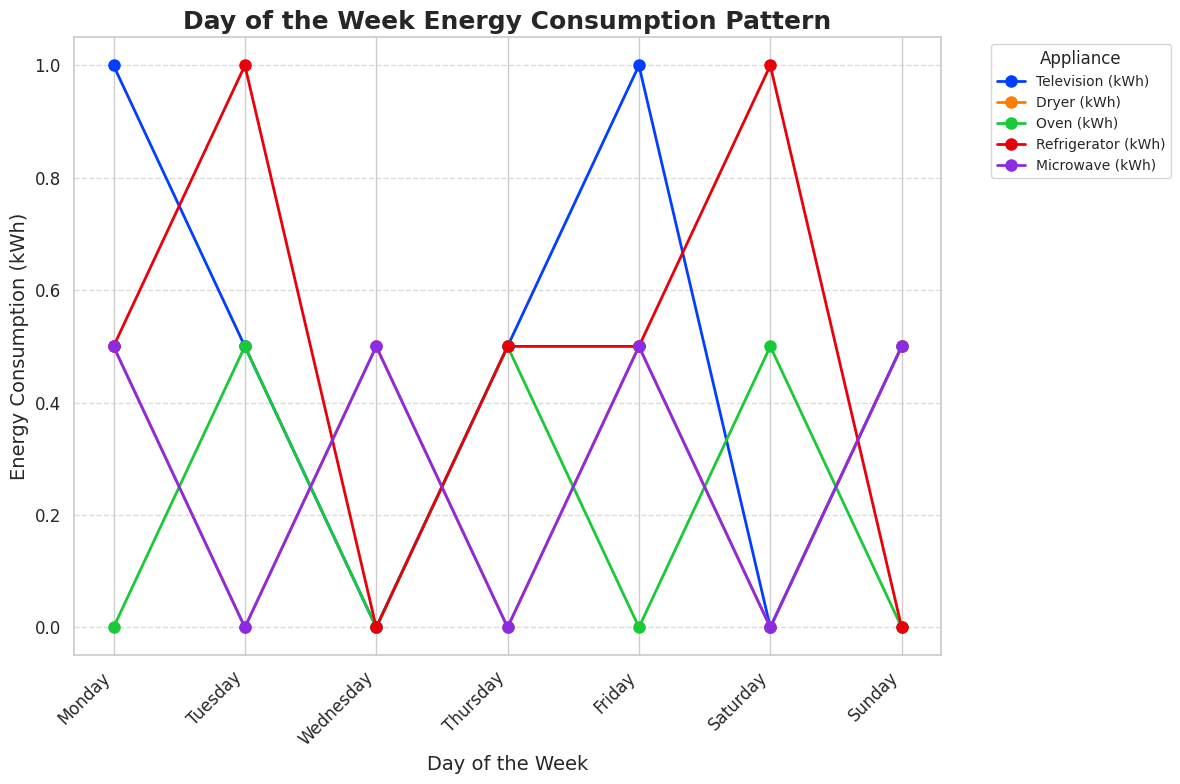

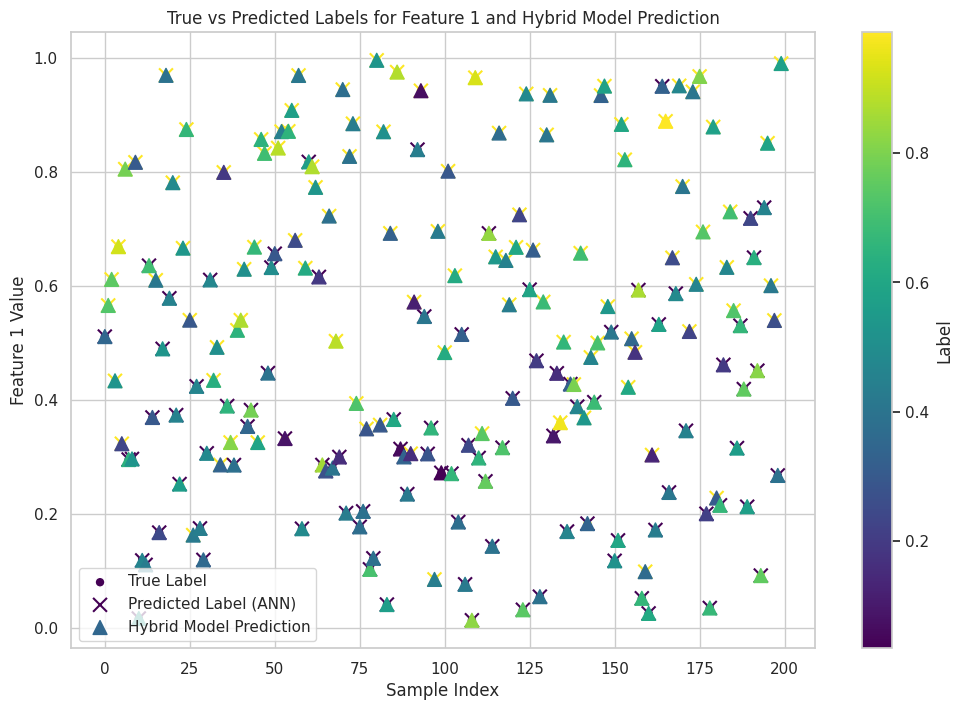

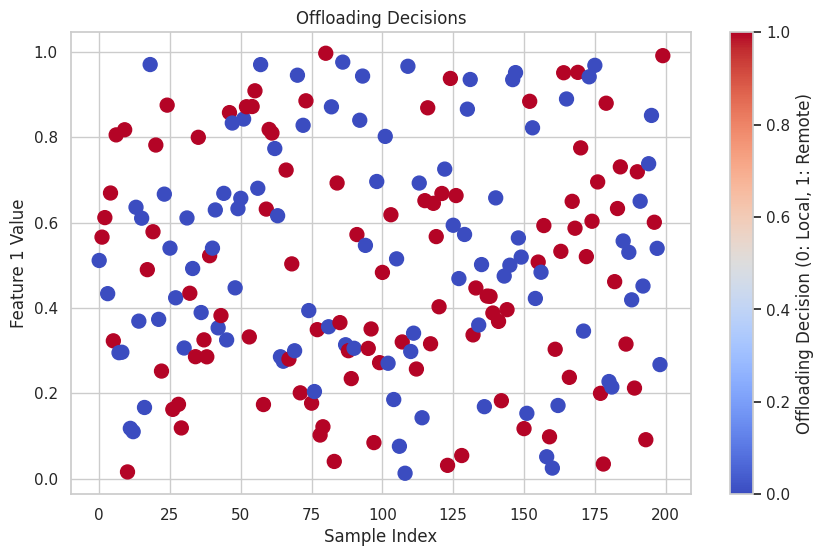

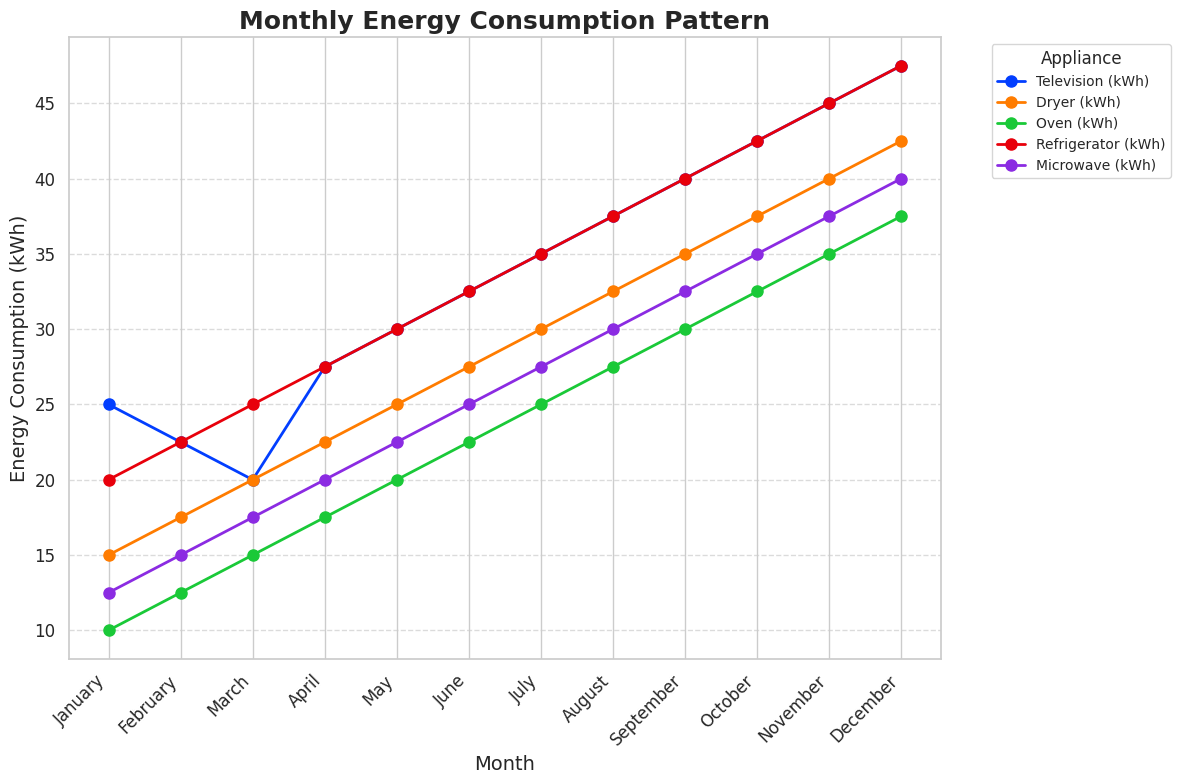

In [ ]:
# Smart home data anayltcis samples

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame with the given data
data = {
    'Timestamp': ['8 am--9 am', '9 am--10 am', '10 am--11 am', '11 am--12 pm'],
    'Television': [0, 1, 1, 0],
    'Dryer': [0, 1, 0, 0],
    'Oven': [1, 0, 0, 1],
    'Refrigerator': [1, 0, 1, 1],
    'Microwave': [0, 1, 1, 1]
}

df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
csv_filename = 'appliance_usage_data.csv'
df.to_csv(csv_filename, index=False)

# Load the CSV file into a DataFrame
loaded_df = pd.read_csv(csv_filename)

# Calculate the total usage time for each appliance
total_usage_time = loaded_df.iloc[:, 1:].sum()

# Set a seaborn style
sns.set(style="whitegrid")

# Create a color palette
colors = sns.color_palette("viridis", len(total_usage_time))

# Plot a bar chart with matplotlib
plt.figure(figsize=(10, 6))
bars = plt.bar(total_usage_time.index, total_usage_time.values, color=colors)

# Add data labels
for bar, value in zip(bars, total_usage_time):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05,
             str(value), ha='center', va='bottom', fontsize=12)

# Add labels and title
plt.title('Total Usage Time for Each Appliance', fontsize=16)
plt.xlabel('Appliance', fontsize=14)
plt.ylabel('Total Usage Time', fontsize=14)

# Hide the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show the plot
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame with the given data
data = {
    'Day of the Week': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    'Television': [2, 1, 0, 1, 2, 0, 1],
    'Dryer': [1, 0, 1, 0, 1, 0, 1],
    'Oven': [0, 1, 0, 1, 0, 1, 0],
    'Refrigerator': [1, 2, 0, 1, 1, 2, 0],
    'Microwave': [1, 0, 1, 0, 1, 0, 1]
}

df_weekly_energy_pattern = pd.DataFrame(data)

# Define energy unit (e.g., kilowatt-hours)
energy_unit = 'kWh'

# Convert energy values to kilowatt-hours
df_weekly_energy_pattern.iloc[:, 1:] *= 0.5  # Assuming a conversion factor

# Plot the Day of the Week Energy Consumption Pattern
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Create a brighter color palette
colors = sns.color_palette("bright", n_colors=len(df_weekly_energy_pattern.columns) - 1)

# Plot a line chart for each appliance
for i, appliance in enumerate(df_weekly_energy_pattern.columns[1:]):
    plt.plot(df_weekly_energy_pattern['Day of the Week'], df_weekly_energy_pattern[appliance],
             label=f'{appliance} ({energy_unit})', marker='o', color=colors[i], linewidth=2, markersize=8)

# Add labels and title
plt.title('Day of the Week Energy Consumption Pattern', fontsize=18, fontweight='bold')
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel(f'Energy Consumption ({energy_unit})', fontsize=14)

# Show legend
plt.legend(title='Appliance', title_fontsize='12', fontsize='10', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from scipy.stats import norm

# Generate synthetic dataset
np.random.seed(42)
n_samples = 1000
n_features = 5

# Generate features (x)
X = np.random.rand(n_samples, n_features)

# Generate labels (y) based on a simple condition
y = (X[:, 0] + X[:, 1] > 1).astype(int)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Run ANN model (Naive Bayes classifier)
model = GaussianNB()
model.fit(X_train, y_train)

# Calculate mean and standard deviation
mean_by_class = {}
std_by_class = {}
for c in np.unique(y_train):
    mean_by_class[c] = np.mean(X_train[y_train == c], axis=0)
    std_by_class[c] = np.std(X_train[y_train == c], axis=0)

# Calculate prior probability
prior_prob = {c: np.sum(y_train == c) / len(y_train) for c in np.unique(y_train)}

# Get observation sequence
observation_sequence = X_test

# Predict parameters
theta_hat = model.predict(X_test)

# Create a hybrid model (Assuming ARIMA and LSTM predictions are available)
w1, w2 = 0.5, 0.5  # Adjust weights as needed
y_hat_arima = np.random.rand(len(X_test))  # Placeholder for ARIMA predictions
y_hat_lstm = np.random.rand(len(X_test))  # Placeholder for LSTM predictions
y_hat_hybrid = w1 * y_hat_arima + w2 * y_hat_lstm

# Final Offloading Decision
P_local = np.random.rand(len(X_test))  # Placeholder for actual computation
P_remote = np.random.rand(len(X_test))  # Placeholder for actual computation
offloading_decision = np.where(P_local > P_remote, "Remote", "Local")

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Feature 1': X_test[:, 0],
    'Feature 2': X_test[:, 1],
    'True Label': y_test,
    'Predicted Label (ANN)': theta_hat,
    'Hybrid Model Prediction': y_hat_hybrid,
    'Offloading Decision': offloading_decision
})

# Visualize the results
# Plot the true labels, predicted labels (ANN), and hybrid model predictions
plt.figure(figsize=(12, 8))
plt.scatter(results_df.index, results_df['Feature 1'], c=results_df['True Label'], cmap='viridis', label='True Label', marker='o', edgecolors='w', s=50)
plt.scatter(results_df.index, results_df['Feature 1'], c=results_df['Predicted Label (ANN)'], cmap='viridis', marker='x', s=100, label='Predicted Label (ANN)')
plt.scatter(results_df.index, results_df['Feature 1'], c=results_df['Hybrid Model Prediction'], cmap='viridis', marker='^', s=100, label='Hybrid Model Prediction')
plt.colorbar(label='Label')
plt.xlabel('Sample Index')
plt.ylabel('Feature 1 Value')
plt.title('True vs Predicted Labels for Feature 1 and Hybrid Model Prediction')
plt.legend()
plt.show()

# Plot the Offloading Decisions
plt.figure(figsize=(10, 6))
plt.scatter(results_df.index, results_df['Feature 1'], c=results_df['Offloading Decision'].map({'Local': 0, 'Remote': 1}), cmap='coolwarm', marker='o', s=100)
plt.colorbar(label='Offloading Decision (0: Local, 1: Remote)')
plt.xlabel('Sample Index')
plt.ylabel('Feature 1 Value')
plt.title('Offloading Decisions')
plt.show()



import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame with the given data
data = {
    'Month': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
    'Television': [50, 45, 40, 55, 60, 65, 70, 75, 80, 85, 90, 95],
    'Dryer': [30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85],
    'Oven': [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75],
    'Refrigerator': [40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95],
    'Microwave': [25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
}

df_monthly_energy_pattern = pd.DataFrame(data)

# Define energy unit (e.g., kilowatt-hours)
energy_unit = 'kWh'

# Convert energy values to kilowatt-hours
df_monthly_energy_pattern.iloc[:, 1:] *= 0.5  # Assuming a conversion factor

# Plot the Monthly Energy Consumption Pattern
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Create a brighter color palette
colors = sns.color_palette("bright", n_colors=len(df_monthly_energy_pattern.columns) - 1)

# Plot a line chart for each appliance
for i, appliance in enumerate(df_monthly_energy_pattern.columns[1:]):
    plt.plot(df_monthly_energy_pattern['Month'], df_monthly_energy_pattern[appliance],
             label=f'{appliance} ({energy_unit})', marker='o', color=colors[i], linewidth=2, markersize=8)

# Add labels and title
plt.title('Monthly Energy Consumption Pattern', fontsize=18, fontweight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel(f'Energy Consumption ({energy_unit})', fontsize=14)

# Show legend
plt.legend(title='Appliance', title_fontsize='12', fontsize='10', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()
